# Meetakshi Setiya, 2019253

## ***IQB Assignment 2***



##Question 1

*Note: I have implemented the algorithm used in the example uploaded on Google Classroom.*

(a) A well-commented code for the Chou and Fasman method for secondary structure prediction on the given protein sequence is given below.

(b) Run the code cell to obtain the output i.e. the secondary structure prediction of the given sequence. H represents Helix, S represents Beta strand, and T represents Turn.

In [ ]:
propensity_alpha = {"E":1.53, "A":1.45, "L":1.34, "H":1.24, "M":1.20, "Q":1.17, "W":1.14, "V":1.14, "F":1.12, "K":1.07, "I":1.00, "D":0.98, "T":0.82, "S":0.79, "R":0.79, "C":0.77, "N":0.73, "Y":0.61, "P":0.59, "G":0.53}   #P_alpha of the residues as given in the question 
propensity_beta = {"M":1.67, "V":1.65, "I":1.60, "C":1.30, "Y":1.29, "F":1.28, "Q":1.23, "L":1.22, "T":1.20, "W":1.19, "A":0.97, "R":0.90, "G":0.81, "D":0.80, "K":0.74, "S":0.72, "H":0.71, "N":0.65, "P":0.62, "E":0.26}    #P_beta of the residues as given in the question 
propensity_turn = {"N":1.68, "G":1.68, "S":1.56, "P":1.54, "D":1.26, "Y":1.25, "C":1.17, "W":1.17, "K":1.01, "R":1.00, "T":1.00, "F":0.71, "H":0.69, "M":0.67, "I":0.58, "A":0.57, "Q":0.56, "L":0.53, "E":0.44, "V":0.30}    #P_turn of the residues as given in the question 

sequence = "SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDTVYCPRHVICTAEDMLNPNYEDLLIRKSNHSFLVQAGNVQLRVIGHSMQNCLLRLKVDTSNPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNHTIKGSFLNGSCGSVGF"           #given protein sequence

helix=["T"]*len(sequence)                              #list to mark helix sites in the sequence
strands=["T"]*len(sequence)                            #list to mark beta strand sites in the sequence
finalstructure=["T"]*len(sequence)                     #list to store the final secondary structure of the sequence

def bwdextension(start, end, structure):               #extends the helix or strand nucleation site leftwards. The function takes start and end indices of nucleation site, structure: H for helix or S for strand as arguements.
    s = start-1                                        #index from which 4-residue extension starts

    while(s>=0):
        site = sequence[s:s+4]                         #the 4-window residue stretch

        score = 0
        for j in site:
            if structure=="H":                         #calculate the total alpha or beta propensity of the stretch  depending on the arguement passed to "structure" (H or S) in the function definition
                score+=propensity_alpha[j]
            if structure=="S":
                score+=propensity_beta[j]

        if (score/4) >= 1 and structure=="H":               #If average propensity is greater than or equals 1 and extension of helix is being done
            helix[s:s+4]=['H']*4                            #mark the site as helix
            s = s-1                                         #start index for the next stretch to be tested/extended
            continue

        elif (score/4) >= 1 and structure=="S":             #If average propensity is greater than or equals 1 and extension of beta strand is being done      
            strands[s:s+4]=['S']*4                          #mark the stretch as strand
            s = s-1                                         #start index for the next stretch to be tested/extended
            continue

        elif not (score/4) >= 1:                            #If average propensity is not greater than or equals 1, the alpha helix/ beta strand cannot be extended further. Iteration stops.
            break

    return


def fwdextension(start, end, structure):                    #extends the helix or strand nucleation site rightwards. The function takes start and end indices of nucleation site, structure: H for helix or S for strand as arguements.
    e = end+1                                               #initialise index for starting 4-window residue sequence site extension

    while(e<len(sequence)):
        site = sequence[e-3:e+1]                            #the 4-window residue stretch

        score = 0
        for j in site:
            if structure=="H":                              #calculate the total alpha or beta propensity of the "site"  depending on the arguement passed to "structure" (H or S) in the function definition
                score+=propensity_alpha[j]
            if structure=="S":
                score+=propensity_beta[j]

        if (score/4) >= 1 and structure=="H":                             #If average propensity is greater than or equals 1 and extension of helix is being done
            helix[e-3:e+1]=['H']*4                                        #mark the stretch as helix
            e = e+1                                                       #start index for the next stretch to be tested/extended

        elif (score/4) >= 1 and structure=="S":                           #If average propensity is greater than or equals 1 and extension of beta strand is being done            
            strands[e-3:e+1]=['S']*4                                      #mark the stretch as strand
            e = e+1                                                       #start index for the next stretch to be tested/extended
            continue

        elif not (score/4) >= 1:                           #If average propensity is not greater than or equals 1, the helix/ beta strand cannot be extended further. Iteration stops.
            break
    return


def findhelices():                                        #finds alpha helix sites in the sequence
    for i in range(0, len(sequence)-5):                   #scan the sequence with a window size of 6
        site = sequence[i:i+6]                            #find the site corresponding to the window
        score = 0
        for j in site:                                    #find the number of residues in the 6-residue stretch that have alpha propensities greater than or equal to 1.
            if propensity_alpha[j] >= 1:
                score+=1
        if score>=4:                                      #if there are at least 4 such residues with alpha propensities greater than or equal to 1
            helix[i:i+6]=['H']*6                          #mark the stretch as a helix
            fwdextension(i, i+5, 'H')                     #extend the helix to the right
            bwdextension(i, i+5, 'H')                     #extend the helix to the left


def findstrands():                                        #finds beta strand sites in the sequence
    for i in range(0, len(sequence)-4):                   #scan the sequence with a window size of 5
        site = sequence[i:i+5]                            #find the site corresponding to the window
        score = 0
        for j in site:                                    #find the number of residues in the 5-residue stretch that have beta propensities greater than or equal to 1.
            if propensity_beta[j] >= 1:         
                score+=1
        if score>=3:                                      #if there are at least 3 such residues with alpha propensities greater than or equal to 1
            strands[i:i+5]=['S']*5                        #mark the stretch as a beta strand          
            fwdextension(i, i+3, 'S')                     #extend the strand to the right
            bwdextension(i, i+5, 'S')                     #extend the site to the left


def overlaps():                                     #find the final secondary stucture after resolving overlaps
    i=0
    while i<len(sequence):                          #continue for entire length of the sequence             
        h = ''.join(helix)                          #convert list to string
        e = ''.join(strands)

        if helix[i]=="T" and strands[i]=="T":                   #no conflict: the index in both arrays is marked as a turn. Since the finalstructure[] list by default stores 'T' at every index, we leave it as for the ith index
            i+=1                                                #increment loop variable for considering the next position
            continue

        elif helix[i]=="H" and strands[i]=="T":                 #no conflict: helix found at index i, mark it in finalstructue[] as "H"
            finalstructure[i] = "H"
        
        elif helix[i]=="T" and strands[i]=="S":                 #no conflict: strand found at index i, mark it in finalstructue[] as "S"
            finalstructure[i] = "S" 

        elif helix[i]=="H" and strands[i]=="S":                 #conflict: helix and strand found at index i
            indh = h.find('T', i)                               #find the index upto which the alpha helix extends
            inde = e.find('T', i)                               #find the index which the beta strand extends

            if indh==-1:                                        #if any of the helix or strand extends till the end, indh/inde would have -1 because of find(). Reassign them len(sequence)
                indh=len(sequence)
            if inde==-1:
                inde=len(sequence)
            
            overlap = sequence[i:min(indh,inde)]                #find the region of overlap starting from index i

            scoreh=0
            scoree=0

            for j in overlap:
                scoreh+=propensity_alpha[j]                                     #find the total alpha propensity of the overlapping stretch
                scoree+=propensity_beta[j]                                      #find the total beta propensity of the overlapping stretch
            
            if scoreh>scoree:                                                         #if the total alpha propensity of the stretch is greater than the total beta propensity                  
                finalstructure[i:min(indh,inde)] = ["H"]*(min(indh,inde)-i)           #mark the entire stretch as an alpha helix in finalstructure[]
            
            else:                                                                     #if the total beta propensity of the stretch is greater than the total alpha propensity                  
                finalstructure[i:min(indh,inde)] = ["S"]*(min(indh,inde)-i)           #mark the entire stretch as a beta strand in finalstructure[]

            i=min(indh,inde)                                                    #increment loop variable to the index after the overlap since we have already marked everything before it
            continue

        i+=1                                                                    #increment loop variable for considering the next position
    return

            
def main():
    global helix, strands, finalstructure, propensity_alpha, propensity_beta, propensity_turn, sequence         #global variables
    findhelices()                                                               #call function to identify alpha helices in the sequence 
    findstrands()                                                               #call function to identify beta strands in the sequence 
    overlaps()                                                                  #call function to find the final secondary structure of the sequence after resolving overlaps/conflicts
    print("(b)\nThe predicted secondary structure for the given sequence is:\n") 
    finalsequence = ''.join(finalstructure)
    print(1, "\t", sequence[:50], "\t", 50)
    print(" ", "\t", finalsequence[:50], "\t", "  ")
    print()
    print(51, "\t", sequence[50:100], "\t", 100)
    print(" ", "\t", finalsequence[50:100], "\t", "  ")
    print()
    print(101, "\t", sequence[100:], "\t", 150)
    print(" ", "\t", finalsequence[100:], "\t", "  ")

main() 

(b)
The predicted secondary structure for the given sequence is:

1 	 SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDTVYCPRHVICTAEDML 	 50
  	 THHHHHHHHHHHSSSSSSSSSSSSSSHHHHHHHHHSSSSHHHHHHHHHHH 	   

51 	 NPNYEDLLIRKSNHSFLVQAGNVQLRVIGHSMQNCLLRLKVDTSNPKTPK 	 100
  	 HTTHHHHHHHHHHSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSTTTTHS 	   

101 	 YKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNHTIKGSFLNGSCGSVGF 	 150
  	 SSSSSSSSSSSSSSSSSSSSTTSSSSSSSSSSTTTHHHHHHTTTTTTTTT 	   


##Question 2

(a) To compare the results obtained from Question 1 to the ones obtained using STRIDE side by side, I have uploaded images of the outputs obtained from both. *Note that in STRIDE, beta strands are denoted by "E" and in my code, they are denoted by "S" as per the instructions in the question.*

* Output from Question 1:
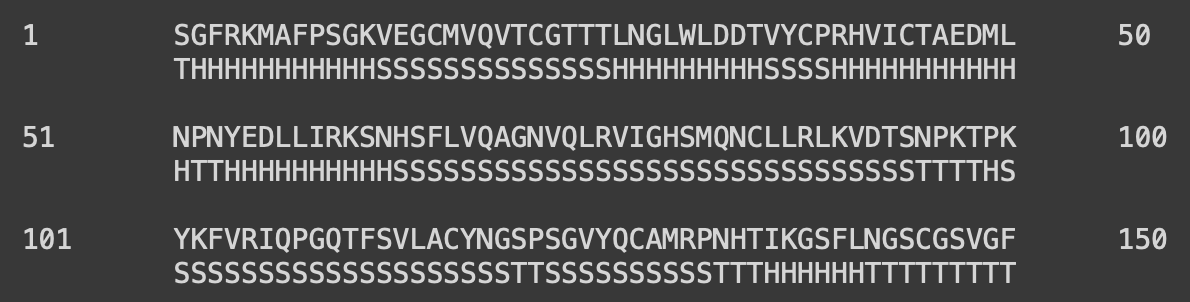

* Output from STRIDE:
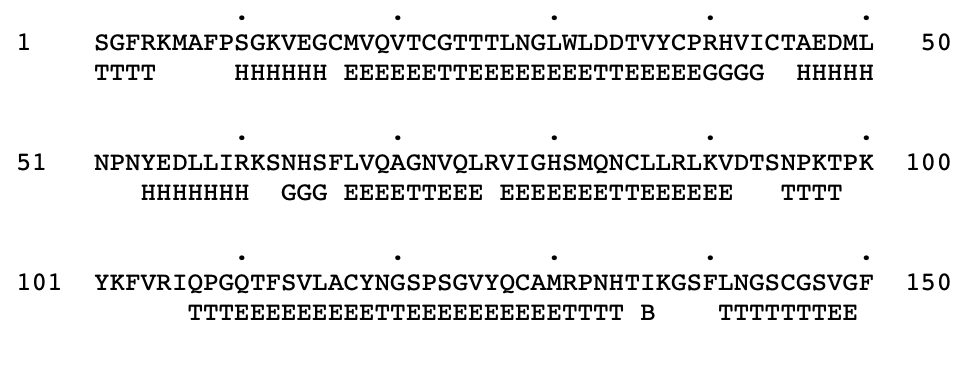

**Regions differing in both in terms of assigned secondary structure can be found by running the code cell below. It will also display the percentage match between the two results.**

Paraphrasing the results obtained from running the cell, the following regions in the input sequence differ in terms of assigned structure-

1. stretch: GFR (index 2 to 4), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Turn.

2. stretch: KMAFP (index 5 to 9), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Coil.

3. stretch: VEG (index 13 to 15), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Alpha Helix.

4. stretch: C (index 16), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Coil.

5. stretch: GT (index 23 to 24), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Turn.

6. stretch: LNGLWL (index 27 to 32), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Beta Strand.

7. stretch: DD (index 33 to 34), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Turn.

8. stretch: T (index 35), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Beta Strand.

9. stretch: RHVI (index 40 to 43), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: 3<sub>10</sub>  Helix.

10. stretch: CT (index 44 to 45), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Coil.

11. stretch: N (index 51), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Coil.

12. stretch: PN (index 52 to 53), structure predicted from Question1: Turn, structure predicted from STRIDE: Coil.

13. stretch: KS (index 61 to 62), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Coil.

14. stretch: N (index 63), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: 3<sub>10</sub> Helix.

15. stretch: HS (index 64 to 65), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: 3<sub>10</sub> Helix.

16. stretch: F (index 66), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Coil.

17. stretch: GN (index 71 to 72), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Turn.

18. stretch: R (index 76), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Coil.

19. stretch: NC (index 84 to 85), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Turn.

20. stretch: DTS (index 92 to 94), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Coil.

21. stretch: P (index 99), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Coil.

22. stretch: KYKFVRI (index 100 to 106), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Coil.

23. stretch: QPG (index 107 to 109), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Turn.

24. stretch: NG (index 119 to 120), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Turn.

25. stretch: SP (index 121 to 122), structure predicted from Question1: Turn, structure predicted from STRIDE: Beta Strand.

26. stretch: RP (index 131 to 132), structure predicted from Question1: Beta Strand, structure predicted from STRIDE: Turn.

27. stretch: T (index 135), structure predicted from Question1: Turn, structure predicted from STRIDE: Coil.

28. stretch: I (index 136), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Beta Bridge.

29. stretch: KGSF (index 137 to 140), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Coil.

30. stretch: L (index 141), structure predicted from Question1: Alpha Helix, structure predicted from STRIDE: Turn.

31. stretch: VG (index 148 to 149), structure predicted from Question1: Turn, structure predicted from STRIDE: Beta Strand.

32. stretch: F (index 150), structure predicted from Question1: Turn, structure predicted from STRIDE: Coil.

There are 77 residues for which the secondary structure predicted by the code in Question 1 matches the one predicted by STRIDE. The percentage match is 51.333%











In [ ]:
print("The columns i, res, op, st, m represent index, residue amino acid present at that index, the structure predicted by the program in ques1 for that position, the structure determined by STRIDE and whether the two structure assignments match or mismatch respectively.\n")
print("i\t|", "res\t|", "op\t|", "st\t|", "m")
print("------------------------------------------")
finalsequence = ''.join(finalstructure)
stride = "TTTT     HHHHHH EEEEEETTEEEEEEEETTEEEEEGGGG  HHHHH   HHHHHHH  GGG EEEETTEEE EEEEEEETTEEEEEE   TTTT        TTTEEEEEEEEETTEEEEEEEEEETTTT B    TTTTTTTEE "
count=0
for i in range(0, len(sequence)):
    status = "mismatch"
    if(finalsequence[i]==stride[i] or (finalstructure[i]=="S" and stride[i]=="E")):
        status = "match"
        count+=1
    print(i+1, "\t|", sequence[i], "\t|", finalsequence[i], "\t|", stride[i], "\t|", status)

print("\n", "Percentage match = ", count/150 *100, "%")

The columns i, res, op, st, m represent index, residue amino acid present at that index, the structure predicted by the program in ques1 for that position, the structure determined by STRIDE and whether the two structures match or mismatch respectively.

i	| res	| op	| st	| m
------------------------------------------
1 	| S 	| T 	| T 	| match
2 	| G 	| H 	| T 	| mismatch
3 	| F 	| H 	| T 	| mismatch
4 	| R 	| H 	| T 	| mismatch
5 	| K 	| H 	|   	| mismatch
6 	| M 	| H 	|   	| mismatch
7 	| A 	| H 	|   	| mismatch
8 	| F 	| H 	|   	| mismatch
9 	| P 	| H 	|   	| mismatch
10 	| S 	| H 	| H 	| match
11 	| G 	| H 	| H 	| match
12 	| K 	| H 	| H 	| match
13 	| V 	| S 	| H 	| mismatch
14 	| E 	| S 	| H 	| mismatch
15 	| G 	| S 	| H 	| mismatch
16 	| C 	| S 	|   	| mismatch
17 	| M 	| S 	| E 	| match
18 	| V 	| S 	| E 	| match
19 	| Q 	| S 	| E 	| match
20 	| V 	| S 	| E 	| match
21 	| T 	| S 	| E 	| match
22 	| C 	| S 	| E 	| match
23 	| G 	| S 	| T 	| mismatch
24 	| T 	| S 	| T 	| mismatch

(b) The secondary structure of the given sequence predicted by Chou and Fasman algorithm used in Question 1 was roughly 51.33% similar to that obtained by STRIDE. The differences observed in the two along with the regions/stretches of difference have been shown in the previous part (part (a)) in detail.

Regarding the differences observed,

* **Reliability of the algorithms**<br>
Chou and Fasman method is an empirical technique that uses the propensity of a given amino acid to form a alpha helix, beta strand or a turn. The method is outdated and is at best 50-60% accurate in identifying correct secondary structures. <br>
STRIDE, on the other hand is a more accurate method deployed to finding the secondary structure of protein sequence from atomic coordinates based on the use of hydrogen bond energy and statistically derived backbone torsional angle information. It is found to predict the secondary structure with over 90% accuracy. <br>Therefore, the choice of algorithm and the difference in their accuracies was one major cause of the differences produced in the two outputs. Considering STRIDE produces the accurate structure for the given protein sequence, Chou and Fasman is expected to give 50-60% accurate results only. The result I obtained in Question 1 matched the one produced by STRIDE by 51.33%.

* **Possibilities of structures considered**<br>
Furthermore, Chou and Fasman takes into account the probability that each amino acid would appear in a helix, strand or turn only. STRIDE on the other hand also considers beta bridges, coils, 3<sub>10</sub> helices, etc. apart from alpha helices, beta strands and turns. Thus the range of assignable structures taken into account by the two methods also play a role in producing different outputs.

* **Deviation from the actual Chou and Fasman method**<br>
On reading the actual Chou and Fasman method, I observed that the algorithm we were taught differed from the actual algorithm. The algorithm used right now didn't approximate alpha propensities into strong or weak helical residues. Also, directions like Proline not being allowed to be a part of inner helix or occuring at the C-terminal helical end, Glutamic Acid and Proline rarely occuring in inner Beta region, and certain amino acids preferring the N-terminal or C-terminal of the helical and strand structures were not considered. This also may have resulted in lowering the accuracy of the prediction from Question 1.

* **Turns** <br>
Another reason why the two outputs differ may be because we did not formally detect Turns in Question 1. Residues that weren't a part of alpha helices or beta strands were assigned as "Turn". The propensities of Turns or any specific directions to detect them were never used. Hence, there may not be turns actually present in the regions that were assigned to be Turns in the code from Question1 thus lowering our accuracy.

The above reasons explain why we observed differences between the outputs from STRIDE and the Chou and Fasman code from Question 1.
